# Toxic comments

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Toxic comments. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [51]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
# from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [52]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

# Function for feature building and extraction on natural language data

In [95]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    toxic_data = pd.read_csv(fn)
    if (not test):
        # add an indicator for any toxic, severe toxic, obscene, threat, insult, or indentity hate
        toxic_data['any_toxic'] = (toxic_data['toxic'] + toxic_data['severe_toxic'] + toxic_data['obscene'] + toxic_data['threat'] + toxic_data['insult'] + toxic_data['identity_hate'] > 0)
        print("toxic_data is:", type(toxic_data))
        print("toxic_data has", toxic_data.shape[0], "rows and", toxic_data.shape[1], "columns", "\n")
        print("the data types for each of the columns in toxic_data:")
        print(toxic_data.dtypes, "\n")
        print("the first 10 rows in toxic_data:")
        print(toxic_data.head(5))
    if (not test):
        print("The rate of 'toxic' Wikipedia comments in the dataset: ")
        print(toxic_data['any_toxic'].mean())
        
        
# function that takes raw data and detects uppercase
# def token_features(token):
# #     toxic_data = pd.read_csv(fn)
#     if token.isdigit():
#         yield "numeric"
#     else:
#         yield "token={}".format(token.lower())
#         yield "token,pos={},{}".format(token)
#     if token[0].isupper():
#         yield "uppercase_initial"
#     if token.isupper():
#         yield "all_uppercase"
#     yield "pos={}".format(part_of_speech)
    


    # vectorize Bag of Words from review text; as sparse matrix
    hv = HashingVectorizer(n_features=3 ** 17, alternate_sign=False)
    X_hv = hv.fit_transform(toxic_data.comment_text)
    print("Shape of HashingVectorizer X:")
    print(X_hv.shape)
    
    #  
    transformer = TfidfTransformer()
    X_tfidf = transformer.fit_transform(X_hv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    toxic_data['word_count'] = toxic_data['comment_text'].str.split(' ').str.len()
    toxic_data['punc_count'] = toxic_data['comment_text'].str.count("\.")
    toxic_data['exclamation'] = toxic_data['comment_text'].str.count("\!")
    toxic_data[''] = toxic

In [99]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    toxic_data = pd.read_csv(fn)
    if (not test):
        # add an indicator for any toxic, severe toxic, obscene, threat, insult, or indentity hate
        toxic_data['any_toxic'] = (toxic_data['toxic'] + toxic_data['severe_toxic'] + toxic_data['obscene'] + toxic_data['threat'] + toxic_data['insult'] + toxic_data['identity_hate'] > 0)
        print("toxic_data is:", type(toxic_data))
        print("toxic_data has", toxic_data.shape[0], "rows and", toxic_data.shape[1], "columns", "\n")
        print("the data types for each of the columns in toxic_data:")
        print(toxic_data.dtypes, "\n")
        print("the first 10 rows in toxic_data:")
        print(toxic_data.head(5))
    if (not test):
        print("The rate of 'toxic' Wikipedia comments in the dataset: ")
        print(toxic_data['any_toxic'].mean())
        
        
# function that takes raw data and detects uppercase
# def token_features(token):
# #     toxic_data = pd.read_csv(fn)
#     if token.isdigit():
#         yield "numeric"
#     else:
#         yield "token={}".format(token.lower())
#         yield "token,pos={},{}".format(token)
#     if token[0].isupper():
#         yield "uppercase_initial"
#     if token.isupper():
#         yield "all_uppercase"
#     yield "pos={}".format(part_of_speech)
    


    # vectorize Bag of Words from review text; as sparse matrix
    hv = HashingVectorizer(n_features=2 ** 17, alternate_sign=False)
    X_hv = hv.fit_transform(toxic_data.comment_text)
    print("Shape of HashingVectorizer X:")
    print(X_hv.shape)
    
    #  
    transformer = TfidfTransformer()
    X_tfidf = transformer.fit_transform(X_hv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    toxic_data['word_count'] = toxic_data['comment_text'].str.split(' ').str.len()
    toxic_data['punc_count'] = toxic_data['comment_text'].str.count("\.")
    toxic_data['exclamation'] = toxic_data['comment_text'].str.count("\!")
    
#     toxic_data['case'] = toxic_data['comment_text'].str.isupper();
    
    X_quant_features = toxic_data[["word_count", "punc_count", "exclamation"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Boolean features
    
    # absCombine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
#     X_combined2 = hstack([X_combined,X_hasher])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    sc = StandardScaler(with_mean=False)
    X = sc.fit_transform(X_matrix)
    print(X.shape)
    if (not test):
        y = toxic_data['any_toxic']
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(toxic_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, toxic_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

In [100]:
# toxic_data = pd.read_csv('/Users/jeharrahpearl/machine-learning-2/ml/final_assignment_1/data/toxiccomments_train.csv')

# raw_X = (token_features(tok) for tok in toxic_data['comment_text'])
# hasher = FeatureHasher(input_type='string')
# X_Hasher = hasher.transform(raw_X)        
   
# print(type(toxic_data['comment_text']))

# Create training and test sets from function

In [101]:
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='/Users/jeharrahpearl/machine-learning-2/ml/final_assignment_1/data/toxiccomments_train.csv', my_random_seed=86)

toxic_data is: <class 'pandas.core.frame.DataFrame'>
toxic_data has 159571 rows and 9 columns 

the data types for each of the columns in toxic_data:
id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
any_toxic          bool
dtype: object 

the first 10 rows in toxic_data:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  any_toxic  
0             0        0     

# Fit (and tune) Various Models

### MODEL: ordinary least squares

In [71]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print(ols_performance_train.performance_measures)

{'Pos': 12983, 'Neg': 114673, 'TP': 6563, 'TN': 55648, 'FP': 59025, 'FN': 6420, 'Accuracy': 0.4873331453280692, 'Precision': 0.1000640361041654, 'Recall': 0.5055072017253331, 'desc': 'ols_train'}


### MODEL: SVM, linear

In [104]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print(svm_performance_train.performance_measures)

{'Pos': 12983, 'Neg': 114673, 'TP': 12893, 'TN': 114588, 'FP': 85, 'FN': 90, 'Accuracy': 0.9986291282822586, 'Precision': 0.9934504546155032, 'Recall': 0.9930678579681121, 'desc': 'svm_train'}


### MODEL: logistic regression

In [112]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log', alpha=0.001,l1_ratio=0.015, max_iter=1000 )
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

{'Pos': 12983, 'Neg': 114673, 'TP': 12822, 'TN': 114539, 'FP': 134, 'FN': 161, 'Accuracy': 0.9976891019615216, 'Precision': 0.9896573016363075, 'Recall': 0.9875991681429561, 'desc': 'lgs_train'}


### MODEL: Naive Bayes

In [106]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print(nbs_performance_train.performance_measures)

{'Pos': 12983, 'Neg': 114673, 'TP': 12725, 'TN': 103447, 'FP': 11226, 'FN': 258, 'Accuracy': 0.910039481105471, 'Precision': 0.531293056657342, 'Recall': 0.9801278595085882, 'desc': 'nbs_train'}


### MODEL: Perceptron

In [125]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron', alpha=0.0001)
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)

{'Pos': 12983, 'Neg': 114673, 'TP': 12875, 'TN': 114569, 'FP': 104, 'FN': 108, 'Accuracy': 0.9983392868333647, 'Precision': 0.9919870560135604, 'Recall': 0.9916814295617346, 'desc': 'prc_train'}


### MODEL: Ridge Regression Classifier

In [108]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier()
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

{'Pos': 12983, 'Neg': 114673, 'TP': 10910, 'TN': 114501, 'FP': 172, 'FN': 2073, 'Accuracy': 0.9824136742495456, 'Precision': 0.9844793358599531, 'Recall': 0.8403296618655165, 'desc': 'rdg_train'}


### MODEL: Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=1, random_state=0)
rdf.fit(X_train, y_train)

rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
rdf_performance_train.compute_measures()
print(rdf_performance_train.performance_measures)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Pos': 12983, 'Neg': 114673, 'TP': 0, 'TN': 114673, 'FP': 0, 'FN': 12983, 'Accuracy': 0.8982969856489315, 'Precision': nan, 'Recall': 0.0, 'desc': 'rdf_train'}


/Users/jeharrahpearl/machine-learning-2/ml/final_assignment_1/my_measures.py:25: RuntimeWarning: invalid value encountered in long_scalars
  self.performance_measures['Precision'] = self.performance_measures['TP'] / (self.performance_measures['TP'] + self.performance_measures['FP'])


### ROC plot to compare performance of various models and fits

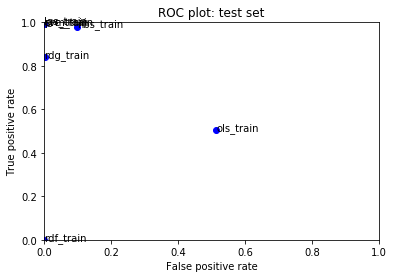

In [78]:
fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train, rdf_performance_train]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ordinary Least Squares (OLS) Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [79]:
ols_predictions = ols.predict(X_train)

### let's look at some false positives:

In [80]:
# false positives

print("Examples of false positives:")

import random, time

for i in range(0, len(ols_predictions)):
    if (ols_predictions[i] == 1):
        if (X_raw_train.iloc[i]['any_toxic'] == 0):
            if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
                print(i)
                print(X_raw_train.iloc[i]['comment_text'])
                print('* * * * * * * * * ')


Examples of false positives:
49
What is it that you can do as well as others? 125.39.16.85
* * * * * * * * * 
53
"

Xmas tree paradox
""For instance, to spare time from having to buy and decorate a Christmas tree every year, the house has a large yet inapparent closet adjacent to the living room where the tree can be stored for later holiday seasons.""

This doesn't seem to make sense, because one is not going to store a once-live tree for a year, nor buy a new artificial tree every year."
* * * * * * * * * 
77
ARGH, YOU JUST DONT GET IT, DO YOU?!?!?!?!?!??!!
* * * * * * * * * 
198
3) Michel De Coster, Les enjeux des conflits linguistiques, L'Harmattan, Paris, 2007 ISBN 978-2-296-0339-8

At hte pages 122-1123, this author, Professor at the University of Liège is writing about the difficulties of the Walloon identy:  The historians ant the economists say that Belgium was the sthe second industrial power of the worl, in proportion to its population and its territory (...) But this place 

1640
"

== Your images
 ==

Hi, your Commons user pages says you'd like to be informed about the use of your images. I was able to use some of them at Kramgasse and Gerechtigkeitsgasse. Many thanks!  "
* * * * * * * * * 
1671
Sigh

I see Domer and Big Dunc are doing their tag thing routine again. I don't know how you have the energy to persevere here. Your a better man than I -)
* * * * * * * * * 
1686
"
Not unless something notable comes out of it. Wikipedia is not meant to be a place to list everything a person does. — T "
* * * * * * * * * 
1702
Hi, the edit I made is definitely right. I know there are posts online that say her birthday is September 3rd, but it's definitely October. You can see here, here, here, here and on her twitter. The 103 stands for October 3rd. 92.239.222.21
* * * * * * * * * 
1742
" 

It's typical vandalism that can be undone by anybody. Wikipedia keeps records of who edits what with each article History page, but it is up to other editors to identify more m

2932
"
My sincerest apologies. Well, you won't have to worry about that this time I suppose. Hmmm, maybe you'll do it then. ♥♥Vampire♥Heart♥ "
* * * * * * * * * 
3021
Channel Four, the British broadcaster. I think it's been added now anyway.
* * * * * * * * * 
3026
kansas bear is not turkish or persian but a loser  retard from hitlers youth trying to change turkish and iranian history on wikipedia. His country does not have any history thats why he is vandalizing every page on wikipedia,making changes on every page. what is your nationality 'kansas' bear? are you too scared to tell?
* * * * * * * * * 
3080
Please use the Wikipedia:Sandbox to experiment with editing on Wikipedia.  Thanks! -  (☎)
* * * * * * * * * 
3081
Article needs improvement 

Article is just a list of vedic deities which is excerpted from Griffin's book. Some points need to be corrected also. Article needs total revamp . If needed, please use the works of Indian scholars as well in devising this article and do no ju

4461
"

 The Original Barnstar 

  The Original Barnstar I noticed that your edits were impressive and so I've decided to award you this Original barnstar! Good job on vandalism fighting too, BTW.   (talk) "
* * * * * * * * * 
4476
In the picture 

I see you smiting pov pushers...
* * * * * * * * * 
4627
First, your user name is L.Wadsworth, not Jay2K. Secondly, a User page should be located at
* * * * * * * * * 
4647
Yes, all of those articles will need to be cleaned up one way or another. Some will need to be improved, some merged, some deleted. Your insistence on filling them with your own original research has tainted them all, unfortunately.
* * * * * * * * * 
4710
Archive Six: February 2008 → March 2008
* * * * * * * * * 
4723
"

The inclusion below....

 Controversial Remarks Alleged Calling Facebook Users ""Dumb F**ks"" 

Quote: To avoid being blocked, instead of reverting please consider using the article's talk page to work toward making a version that represents consensus am

5828
Not only is there a consensus among federal agencies that the populated place named Tornado never existed and the short-lived census designated place named Tornado should never have been created, but this consensus is shared by all state and local government agencies as well. The United States Board on Geographic Names is the final arbiter in all issues related to geographic names in the United States and their definitive opinion is that Tornado was only ever a variant name for Upper Falls. Thus, my merger of the Tornado, West Virginia article here will only include references to the Tornado Post Office and not the Tornado CDP, which was created in error. It should be noted that the Tornado CDP had most of its population in Lincoln County, while the Upper Falls CDP is contained completely within Kanawha County. Therefore, no comparisons between the two are even possible, as their geographic overlap was relatively tiny. The Tornado CDP was ill-conceived, ill-planned and ill-execute

7324
"
Hoax claim
This is not a complete hoax per . However, this is not a reliable source and does not establish notability. —Talk "
* * * * * * * * * 
7371
"

Thanks
Thank you for your comments over at the article on ""Expelled"". I appreciate that there are pro-evolution editors that don't feel the need to write ""set the record straight"" pamphlets on all Intelligent Design or creationism related pages.   "
* * * * * * * * * 
7450
. 

(1) It is not as a memorial to these people; it is to ensure a thoroughly balanced coverage of the event. I have created
* * * * * * * * * 
7567
I just posted a link at the front page of the article for the Tom Hanks Family Tree that proves he has Portuguese ancestry. Also, another site I came across also proves that Tom Hanks and Abraham Lincoln, are relatives, some even debate that Abraham Lincoln comes from Portuguese immigrant lineage...as well as Al Gore. I haven't found any sources YET that proves that both Lincoln and Gore are from Portuguese i

8951
"
I think that's the best move for now. The article can always be moved later. I'll have to look at how Wikipedia handles authors - whether they have the articles under pen names or actual names.  Talk "
* * * * * * * * * 
8956
Fun 

Beowulf is an exciting story to read and I really enjoyed it.
JN
* * * * * * * * * 
8984
"

Firstly, I would really like to thank you for your kind response here! ) As for me calling Rlevse ""racist"", that's what it looks like from the way he seems obsessed with keeping out any Lebanese claims. About edit warring: The edit warring article says this ""Edit warring is the confrontational, combative, non-productive use of editing and reverting to try to win, manipulate, or stall a discussion, or coerce a given stance on a page without regard to collaborative approaches"" and also, ""Typically a user who edit wars is ignoring editorial norms, reverting rather than taking due consideration of the points made by others."" But it also says: ""It states that

10844
Here, just start here, http://www.mebaroverseers.org/attorney_search.asp , enter your Bar No, and please promptly provide a copy of results.  Thank you.
* * * * * * * * * 
10847
"

 Double-quote redirects 

Can you please explain why you redirected something in double single quotes?  I just don't see any possible value in that and was wondering if you could explain.   "
* * * * * * * * * 
10867
Yes well it may not appeal to you on a personal level, however it contributes towards the scope and depth of knowledge available in Wikipedia. Please leave it alone and find more useful things to do.
* * * * * * * * * 
10928
I am interested in the two vessels above, as our family surname is Harfleet (which translates into Harfleur in French where we originate from) I am trying to see if there is any relevance for our family tree - if anyone has any information then that would be great,

Thanks

Vicky (Harfleet)
* * * * * * * * * 
10951
I can't access the original source for some reason. Mo

12739
Title of article
This article's title should be University of Puerto Rico, Río Piedras campus to reflect correct spelling of Río Piedras and Wikipedia conventions regarding capital letters.
* * * * * * * * * 
12775
The big deal is that the article is making a specific health claim about allergies, and that the Anthroposophic 'lifestyle' is responsible, and that that lifestyle includes minimal use of the MMR vaccine.

Later under the immunization controversy section there is no discussion about the observable fact that the students who are at Anthroposophic schools are in fact under immunuzed.
* * * * * * * * * 
12794
Young, Rich and Dangerous
Can somebody create a page for Young, Rich and Dangerous and upload the album cover, pleaze?
* * * * * * * * * 
12827
I don't mean to be a downer -(  BTW, I stole your username template. It looks great!
* * * * * * * * * 
12851
"

""Japanalogy""?  Really?
Given that neither of the linked sources use this term  instead favoring ""Japanese Stu

14179
"

 Uh, it's actually your opinion of someone else's opinion that the said quote establishes that one person's words actualy are trying to convey that Fangio was the best. And, good luck with that. As I demonstrated above, I totally destroyed the argument of his greater WC average. Plus, as most people know in racing, half of Schumacher's racing career he was racing with sub-par cars. He went from a winning team to a losing team and turned them into the ""winningest"" team ever."
* * * * * * * * * 
14285
I have just lost stacks of work because of you! Please chck before blocking London in future, especially as you have been warned before.
* * * * * * * * * 
14299
"
Elizabeth I was referred to as Elizabeth I ever since the 16th century! This is absolutely not a modern convention. Please refrain from talking about subjects you seem not very familiar with. As for the Chinese case, Liu Bang and Xiang Yu were commoners, and their family names were used with their given names. I believ

15851
half moon investigations 

hi im trying to expand the half moon series. there is a book and a tv show as well as comics. instead of going straight to the novel page, would it be possible to have a disambiguation page so that all three links come up.

i dont know if im going about it the right way, but i created an identical article to half moon investigations called half moon investigations (novel) and i will be constructing one on the comics. could it be possible to rename the article half moon investigations (disambiguation)?

thanks, halfmoonfan
* * * * * * * * * 
15866
This message is regarding the page Bobby Charlton. Thanks for experimenting with Wikipedia.  Your test worked, and has been removed. Please use the sandbox for any other tests you want to do. Take a look at the welcome page if you would like to learn more about contributing.  Thanks.  (spit)
* * * * * * * * * 
15876
You have been temporarily blocked from editing for vandalism of Wikipedia. If you wish to make u

17773
"

This is my last reply if you continue to present yourself in this manner.  Please write more civilly.

I expect people to go to Oyster Bay just as I expect them to go to Barre, Vermont.  When you type that, do you expect a disambiguation page or do you except the city?  Admittedly, it's not the most convenient, but that's the way it is in all eight ""town"" states.  Are you going to try to change every single community with this sort of disambiguation?  If so, go ahead — but unless you so desire, don't try to have one or two changed.  You speak of errors that result (for example, the Oyster Bay disambiguation page) — I do my best to fix wrong links as a result of changes such as this, but I don't see why I must be held responsible for every single wrong link.  If you never make mistakes, that's good; but I suspect that you so do.  So what?  It doesn't matter if you make a good-faith error, especially if you try to fix it once you realise that something's wrong.

By the way, if

19900
Welcome!

Hello, , and welcome to Wikipedia! Thank you for your contributions. I hope you like the place and decide to stay. Here are some pages that you might find helpful:
The five pillars of Wikipedia
Tutorial
How to edit a page
How to write a great article
Manual of Style
I hope you enjoy editing here and being a Wikipedian! Please sign your messages on discussion pages using four tildes (~~~~); this will automatically insert your username and the date. If you need help, check out Wikipedia:Questions, ask me on , or ask your question on this page and then place {{helpme}} before the question. Again, welcome!   (Elkspeak)
* * * * * * * * * 
19928
Hafez al-Assad
Hi, Wüstenfuchs, I'm beginning the copy-edit you requested for the above article at the GOCE request page. Please feel free to contact me, or to correct or revert my edits if I'm doing something I shouldn't. Cheers,
* * * * * * * * * 
19949
Do what you have to. ← What's up, Doc? carrots→
* * * * * * * * * 
20014
The num

21999
"

 Please do not add unsourced negative or controversial biographical material to pages, as you did with this edit to Stuart Tyson Smith. If you continue to do so, you will be blocked from editing.  13  "
* * * * * * * * * 
22051
Cheers 
Thanks for the back-up, you might want to have a look at this.
* * * * * * * * * 
22063
"

:Pan-Pearl River Delta Regional Cooperation
A tag has been placed on Pan-Pearl River Delta Regional Cooperation, requesting that it be speedily deleted from Wikipedia. This has been done under the criteria for speedy deletion, because it is a very short article providing little or no context to the reader. Please see Wikipedia:Stub for our minimum information standards for short articles. Also please note that articles must be on notable subjects and should provide references to reliable sources that verify their content. 

Please do not remove the speedy deletion tag yourself. If you plan to expand the article, you can request that administrators wait a w

24240
It's in Academic Search Premier
* * * * * * * * * 
24300
"Thanks for experimenting with the page T-Bone Walker on Wikipedia. Your test worked, and has been reverted or removed. Please use the sandbox for any other tests you want to do. Take a look at the welcome page if you would like to learn more about contributing to our encyclopedia.  Thanks.    說嗎? "
* * * * * * * * * 
24367
It was wrong of me to assume, but it was not meant to be an attack, just my opinion on why the template might be there when I see no need for it to be there. That aside, I do believe the template is no longer needed. 72.39.23.16
* * * * * * * * * 
24368
this is most certainly not a trolling account.
* * * * * * * * * 
24420
Warning

I am not breaking any tules. You are one post away in two areas from breaking the rules. i sent you two warnings. You can however, delete this section.
* * * * * * * * * 
24424
"
Also, I must point out that the time-difference between my edit at his talk page and your warning

26349
Sorry again, I had to revert my edit. Problem Fixed.
* * * * * * * * * 
26500
System Flaw 

Can you please find a box shot for this game aswill thanks
* * * * * * * * * 
26555
FYI  Range is blocked...   Link here
* * * * * * * * * 
26635
"

You claim, yet again, that the text ""For example India-based iYogi was reported by InfoWorld to use scare tactics and install undesirable software"" is not supported by the sources. This is incorrect, as BOTH sources support BOTH these assertions.  ""Brian Krebs, a former Washington Post writer who now operates his own blog, Krebs on Security, tested iYogi himself and discovered that the company was indeed using scare tactics to coerce users into signing up. [...] then immediately went into my control panel and deleted what [iYogi] put on my computer [...]""  and ""[...] iYogi was using support calls to aggressively sell annual subscriptions [...] proceeded to install an iYogi ""tune up"" tool called PCDiagnostics"".  It took less than 30 sec

28469
Please stop your disruptive editing. If you continue to vandalize Wikipedia,  you will be blocked from editing.    

 Please stop your disruptive editing. If you continue to vandalize Wikipedia,  you will be blocked from editing.    

 Please stop your disruptive editing. If you continue to vandalize Wikipedia,  you will be blocked from editing.   

 Please stop your disruptive editing. If you continue to vandalize Wikipedia,  you will be blocked from editing.
* * * * * * * * * 
28544
"

 Hi, FPS 

I understand what Niko discussed on the talk-page, but I think that it is correct to put the image in the ,,Historical perspective"" section, because it represents one phase from the relations between Macedonia and Greece (not to mention that it is undoubtedly connected to Macedonia naming issue). I really don't want to initiate the well-known quarreling and bickering around these types of articles, but presenting the arguments from both sides is crucial (NPOV).  Thanks,   "
* * * * * 

30270
Your edit to Wikipedia:Your first article 

Please refrain from adding nonsense to Wikipedia, as you did to Wikipedia:Your first article. It is considered vandalism. If you would like to experiment, use the sandbox.
* * * * * * * * * 
30280
Snuggums doesn't know what he talks about. Ignore him. He's a vandal.
* * * * * * * * * 
30311
POV 
I noticed you have twice removed an image and called it POV. I am curious, how is it POV?
* * * * * * * * * 
30390
Can you please explain why you insist on making contentious edits and turning every single wikipedia article that peripherally discusses Israel into a battleground. You have been topic banned before for engaging in this type of battleground mentality and it is apparent from your recent edits that you intend on going down the same path that previously got you banned.
* * * * * * * * * 
30519
Liverpool/Portsmouth
Isn't Portsmouth making a late application for a UEFA licence? Has UEFA ruled on it?
* * * * * * * * * 
30522
It was a legi

32185
An addition - we did learn today from Knodell (the WH Director of Security) that despite President Bush's promise to 'get to the bottom' of the question of who leaked Valerie Plame's role within the CIA WMD counter-proliferation division to the press, no such investigation ever took place.
* * * * * * * * * 
32211
gross worldwide 

to be added only at the end of the film's run
* * * * * * * * * 
32235
Thank you so much! It's very much a team effort, and we're fortunate in having a number of excellent, neutral editors keeping the article content in check... so, keep up your end of the good work, too.
* * * * * * * * * 
32313
May 2014 (UTC)

Should we include the reception from Rodriguez since it is directed at Weisbrot and not Chavez?  21:31, 15
* * * * * * * * * 
32336
I was only bring up the topic if someone wanted to add. Since its theological in nature and we have admins that are very objective about certain theological content and removing the material, I was only mentioning 

34232
Not all languages have their proto- counterpart.
* * * * * * * * * 
34296
Removed uncited apologetics. 

Here's the text I removed.

It should also be noted that followers of many great personalities have come to magnify the person after being deeply affected by the ideas of that person.  This does not by necessity reveal faults of either the person being idolized or the ideas they have shared.  Furthermore, the social and intellectual image of her philosophy, which was somehow preserved by Rand during her life, was left in the hands of others after her death.

This was clearly added to spin some POV onto the otherwise critical passage.  It appears to be OR and POV, so I've removed it.  If it can be rewritten so that it cites some relevant, reliable sources, perhaps it should then be reinserted.  Al
* * * * * * * * * 
34359
"

 etymology 

The family consists of the genus Aplodactylus. The name means either ""single finger"" or ""simple finger"" (Greek haploos / aploe + daktylos)

36719
Better, but now it replaces |work=[[Variety (magazine)|Variety]] with |work=Variety| - the extra pipe should be removed.  Thanks!
* * * * * * * * * 
36730
Please read Wikipedia's Terms of Use http://wikimediafoundation.org/wiki/Privacy_policy. Thank you.
* * * * * * * * * 
36785
Um no, that's not what AQFK is asking about.
* * * * * * * * * 
36792
"
As I suspected, complete nonsense. Your statement is so silly that I can't begin to tell you how wrong it is. You said, ""You there presume that your not-yet-filed Arbcom case has been decided"". I assure you that this was not the case - I would consider that to be a stupid assumption. I am not a stupid person. I would therefore ask that you assume good faith on my part, and withdraw everything on this page based on your mind-reading trick.
You quote out of context and misrepresent when you describe part of my questioning as the ""lack the intellectual ability comment""
By the perverted interpretation of standards you are trying to ap

39080
"

Again, I began by saying that I don't think the word is perfect and that it needed to be worked out here rather than simply excised with an NPOV comment on the edit. And, actually, I do have a similar remark from Raul Hilberg's mouth later in the article, but I don't believe that this entirely addresses POV/NPOV. My point is not to say that the Anschluss cannot be viewed as the military annexation of Austria but that to view it as ""simply"" that would be to ""misunderstand"" its essence, which would not in any case provide anything like absolution but does have the effect of changing the subject (hence my wording ""tends to conceal""). In any case, to make such a claim without remarking on its limited analytic value and obvious propaganda value would be to set aside a number of basic facts presented elsewhere in the article, and to simply reiterate an argument without quotation or attribution and in any case without pointing out what immediately contradicts it is POV of a sub

41263
Please do not add empty sections to articles 

as you did to Oberon Zell-Ravenheart. Since several styles of citation are permitted by WP:CITE, and not all of them use a notes section, adding such an empty section is rather presumptive on your part in an article of which you are not one of the regular editors. WP:CITE clearly states that it is the regular editors of the article who get to decide which of several citation methods will be used. Some of these use inline citations without footnotes... Please read WP:CITE more closely and don't assume that a particular form of citation must be used. —
* * * * * * * * * 
41269
. If I come to your talk page, please reply there. If you come to me, then I'll leave a talkback on your page
* * * * * * * * * 
41271
Absolutely correct Yas, I propose to disgregard Jayjg's latest garbage and get the POV check anyway.
* * * * * * * * * 
41415
I was the one the put this page up, and, when I brought ministry of dreams to net, it did not exist, God

43280
Vandalism
 10:54, 10 Jan 2005 (UTC)
* * * * * * * * * 
43300
This  is perhaps an earlier version that you may have found as more acceptable.  I certainly do although some of the changes I've suggested below should also be made to this version  specifically a clarification of what the significance of the numbers and ratings awarded by the charity watchdogs are.
* * * * * * * * * 
43363
"

 after further investigation, I am not sure if this was inappropriate content or not. just so you know, it would be much easier on all of us if you would register so that we might could discuss your edit. I am not an expert on the subject of the article that you posted, and as a result saw the types of edits you made thinking that perhaps you were trying to add info that wasn't true. please do me a favor, if you are willing to, and hit me up on my talk page to let me know one way or the other... in the mean time I will set this page up on my watched list... if I dont hear back from you I will go 

45463
As the blocking admin, I obviously won't be reviewing this unblock request myself, but it might be useful to either Cmach or the admin who does review this to hear my thoughts: as I said in my blocking notice, I don't think Cmach is trying to do anything wrong, but I do think he currently lacks the judgment to know whether any given action he thinks about taking is a good idea or not. We've seen repeated behavior over the past six months or so that indicates this, and now that it's gotten into the realm of not only poor political choices (things like excessive RFAs, RfB noms, etc) but poor safety ones, I personally don't think it's in Cmach's best interests to continue editing unless and until he can demonstrate (via things like an unblock request or private communication with arbcom or an oversighter) that he has developed the required competence.
* * * * * * * * * 
45464
LOL to me lol lol lol
* * * * * * * * * 
45486
"
Hey . Any idea when you will get to review this?  Phightins

47933
Shipwrecked  

Is it really still on?
* * * * * * * * * 
47956
James Christian's city 

Okay, that's fair enough. All I did was change it from Connecticut to Florida.
* * * * * * * * * 
48094
to 2007 Glasgow International Airport attack
* * * * * * * * * 
48110
History of fatal accidents at Iowa AAP 

Iowa AAP has a history of accidental explosions resulting in multiple fatalities.

 2 killed in explosion 12 June 2006  http://spanky.thehawkeye.com/features/IAAP/breaking/b1_0614.html

 5 killed in explosion 7 June 1968  http://news.google.com/newspapers?nid=1350&dat;=19680608&id;=RGcxAAAAIBAJ&sjid;=mwEEAAAAIBAJ&pg;=2025,668035  

 4 killed in explosion 23 June 1967

 1 killed in explosion 1 July 1966

 4 killed in explosion 18 June 1958

 2 killed in explosion 5 May 1955

 22 killed in explostion 22 March 1942

 13 killed in explosion 13 December 1941  

Above cited in Burlington Hawkeye article of 9 June 1968 reporting on 7 June 1968 accident

http://www.brumm.com/genealogy/showm

50241
"
 Your request at Files for upload 
 Hello, and thank you for your request at Files for upload! I've looked over your request and left a comment. Please check the comment and respond at your request on the main Files for Upload page (not here). Your request will stay there for seven days and then it will be archived. Regards,  ЛееСуда.  "
* * * * * * * * * 
50246
Word!  63.246.174.4
* * * * * * * * * 
50313
"
As a typical example of the damage to which this non-collaborative editor Jonathan is willing to do to push his views, see this statement he recently back put in: ""Ramana Maharshi's teachings have been further popularised [sic] in the west as neo-Advaita via H. W. L. Poonja and his students.{{sfn|lucas|2011|p=94}"" That is of course total opinion that ""neo-Advaita"" conforms accurately to Ramana's teachings since Ramana even had a problematic relationship with traditional Advaita, and it is a claim widely disputed as well as conflicting with the rest of the article. A clo

52268
"

 KDWB-FM 
Excuse me, but the edit to the KDWB page was accurate and certainly not ""unconstructive"".  Extreme Jaime's name is ""Jaime Guse"" and is witnessed on the insert for the ""Best of the Dave Ryan in the Morning Show"" CDs.  I am reverting this back.  Do not vandalize this again.  Thanks.

24.118.42.187  

"
* * * * * * * * * 
52297
Good job
I would suggest nominating this at WP:GA nominations, but first I would see if you can explore themes and style more from all the sources you have. You may or may not be able, to depending on how thorough their evaluations of the book are,
* * * * * * * * * 
52341
Well Sine it does not really matter seeing how I cannot get full response back. If what I add is baised then can you tell me how the lines that were removed from the controversy section that told of students being made aware of the program not having MS Accreditation can be removed to negatively reflected ECA. It was a fact and also covered in the same news story that ECA

54264
Hello! 

Long time no shart!
* * * * * * * * * 
54268
Was awaiting the firm to publish latest assets under management and total employee information at the close of Q4 2014. The article looks solid and factual at this point.
* * * * * * * * * 
54275
}}
{{Auto archiving notice|bot=Lowercase sigmabot III|age=1|units=year
* * * * * * * * * 
54279
"
I demand you to accept my more sincere excuses, though I was answering to a user who also is a librarian in es:wikipedia. Sorry!   (What's up Doc?) "
* * * * * * * * * 
54558
It could have been an defective attempt to summarize the article in the lead. What's your suggestion ? I agree with Seyyed, we'd better not go thorough the details.
* * * * * * * * * 
54582
"
Well, I'm kinda lazy too about creating content ) but I'm trying to make that a bigger part of my WP experience.  I'll take a look at those articles.  I do look forward to a more collaborative working relationship going forward.  4th "
* * * * * * * * * 
54618
"

 Your most exce

56557
"

 ""sockpuppets""? 

I appologize if I did anything wrong. I am a student doing research on bazaarz in Pakistan and India. I have copied some pictures from Wikipedia. If that is not allowed let me know. I do not understand what a ""sockpuppet"" is but it seems that I have violated something to grant a warning from your site. Any help will be greatly appreciated. 

Thank you,
David T"
* * * * * * * * * 
56579
PS Partizan supporters have inferiority complex so there is no real rivalry.
* * * * * * * * * 
56606
Hey Kpjas, as I remember, I regularly got back to your warnings with mostly appologetic notes. With English being my second language, it's not so easy for me to adress all your options for a complain or explanation of the dispute. Sometimes it takes time to formulate the right sentence with the right words to complain or go into further discussions and explanations. And I might not always have enough time for doing all that. I'd rather not complain or go with short notes, t

58708
Removed those entries that are SMP clustered.
* * * * * * * * * 
58807
I do have a well-defined purpose in mind: to generate orthogonal projections of n-dimensional uniform polytopes into k-space, maximizing the distance between the image of any j-facet and that of any non-incident (k-1-j)-facet.  (Nearly all of the higher polytope images in Wikipedia are aligned for maximum symmetry instead.)  This means – or at least can be approximated by – excluding some bounded pieces of the Grassmannian, and finding the 'points' furthest from the excluded pieces.  A tractable mental image of the space that contains the exclusions would help!
 After another look at operator norm, I have a slightly better idea of the shape of my problem; just enough to see a flaw in the most obvious approach, and not enough to see a practical way around the flaw. —
* * * * * * * * * 
58844
"

 Source 

We don't need to add the government document directly, the figure of 500,000 Indians in Bangladesh is cited 

60819
Welcome to the Wiki, fellow Calgarian! -  - Talk
* * * * * * * * * 
60889
"

 WP:RFBRC 

IMAGE UPLOADED at Image:Pedro BRC.jpg. May I?    Chat   "
* * * * * * * * * 
60893
I need a word with him. User:Puncharoo Read my page first
* * * * * * * * * 
60937
Arctic Tipping Points project

Has been deleted for being a copy of this please do not copy text from other sites.©
* * * * * * * * * 
60938
Spam
You have a right to raise the deletion of PayPay at deletion review but I doubt whether you will find any support. It was pure advertising.   (Talk | contribs)
* * * * * * * * * 
60956
"

See also WP:ANI#Edit war/conflict of interest Talk:British Gazette#Unrelated publication.  "
* * * * * * * * * 
60974
"
If I'm not mistaken, Mabdul requested deletion of the page so he could make a page move.  Mabdul, if you're not going to make a page move or provide any other reason why the page should remain deleted, please let me know so that I can restore the page. -'''''' (TALK) "
* * * * * * * *

62785
for sources).
Libertas Ireland (LI) 
Mouvement pour la France (MPF) 
Chasse, Peche, Nature, Traditions (CPNT) 
Libertas Poland (LP) 
Partido da Terra (MPT) 
Ciudadanos-Partido de la Ciudadanía (C) 
]]
Hix-Lord diagram done. It depicts positions at May 29 2009 of Libertas Ireland (LI), Mouvement pour la France (MPF), Chasse, Peche, Nature, Traditions (CPNT), Libertas Poland (LP), Partido da Terra (MPT), Ciudadanos-Partido de la Ciudadanía (C) on a Hix-Lord diagram (Europhiles at the top, Eurosceptics at the bottom, Economically left-wing to the left, Economically right-wing to the right). Positions derived from http://www.euprofiler.eu/page/1 . Regards,
* * * * * * * * * 
62786
"

Speedy deletion of Andrew takao
 A tag has been placed on Andrew takao requesting that it be speedily deleted from Wikipedia. This has been done under section A7 of the criteria for speedy deletion, because the article appears to be about a person or group of people, but it does not indicate how or why t

64818
REDIRECT Talk:Georgian Jews in Israel
* * * * * * * * * 
64823
I was shocked you'd missed this terrible POV.  Maybe you were going back to re-review it later.  I guess the ego comment has bitten you, if you can't handle the criticism of your own review quality.  Sorry about that.
* * * * * * * * * 
64896
"::::Here's what I experienced. (1)Fyslee has made false and defamatory claims that he was ""libeled"" by me. (2) He repeatedly deletes what he doesn't want the public to know, making unsubstantiated claims of being ""attacked."" His claim that he is not going to sue me even though I ""libeled"" him is, to use Wiki Terms, ""weasel."" I have asked for evidence of his accusations of libel and he refuses to provide it. If you would like me to carefully illustrate his years of working closely with Stephen Barrett, including as one of the censors on the Healthfraud List, I will readily do so. Did he claim he would sue me, no. However, he made a much more egregious claim ... he falsely

67226
"
No problem! Best. zach "
* * * * * * * * * 
67332
(UTC)
Inserting citations
Hi Ariel,

here is the code now:
 http://angielittlefield.com/ebooks/TomThomsonTorontoNeighbourhoods.pdf Indeed, Thomson painted a number of watercolours between 1904 and 1909.http://www.tomthomsoncatalogue.org/catalogue/index.php?pageNum=0 
okay step one is erase the two cn tags

step two - in front of the http insert thus   step three - athe end of the url ref put this   
I will go correct the first one. Then please you try correcting the second one, and I am sure you will go perfect!  The article is shaping up quite well!  Congrats.  Please ask any questions here, and I will answer them for you.  You may also email me from the link at the top of my talk page, or you can also post a note on my talk page.  I am glad to help!  I really enjoy collaborating with other editors! Just ask!   Cheers!       18:39, 27 May 2015
* * * * * * * * * 
67343
I anticipate, from past experience, that other editors may y

69238
"
I would ask user   "
* * * * * * * * * 
69311
"
No objection if you write up the children's home: H. M. Brown (he was also an Anglican oriest and the author of several books) says this about the home «He had inaugurated a Home for orphaned children in a one-time public-house, receiving for care and attention children commended to him by the local authority.» (one of the things he mentions about St Hilary in Twenty Years is that it had four public houses) In the next paragraph he says: «His church had been gradually enriched with painted choir stalls, pictures, statues and several altars of stone. Its appearance was neither exactly Roman, nor medieval, but largely sui generis, every ornament and gift the result of love.» (Brown: A Century for Cornwall; p. 98) The children's home is described in chapter 18 of Twenty Years. This is called ""The Jolly Tinners"" (an appropriate name in St Hilary), pp. 190-197; apparently the boys and girls were not local but came mainly from Shoredi

71105
Excellent suggestion. )
* * * * * * * * * 
71140
Vandals stop messing with this page!
* * * * * * * * * 
71142
"As you will have by now seen, the most recent argument you have offered for not wanting the M&G; image was rejected as not being entirely on point. I point it out to indicate that perhaps your ""familiarity"" could do with something of a refresher course. And those elements you mentioned wishing to do away with all non-free images? Those folk are pretty much considered....well, let's just ay that they are in the significant minority. So long as Fair Use criteria is adhered to (as in, say, the Mirth & Girth'' image), WP is protected. While it is good that you strive to use only free imagery, be aware that free is not always going to be more encyclopedic than non-free. The guiding principle is whether it is of encyclopedic value, not whether it is free.
As the image is of the subject of the HW article as well as being on point int he M&G; article, it will be staying. Than

73482
I agree with  and  that reference to the longest military occupation in modern times should be included in this article. The POV of this article is currently WP:FRINGE and needs to be moved to a NPOV.
* * * * * * * * * 
73508
Well, it was deliberate vandalism so you don't have to be so kind, Jeff. He deserved a worse warning. -
* * * * * * * * * 
73630
I was going to suggest the Tung Shing; and that its omission here seems both serious and sinophobic.5.150.92.174
* * * * * * * * * 
73666
", 18 June 2007 (UTC)
As long as they are good-faith tags, I see no reason to stop. All articles has to conform to policies, and school articles is no exeption. To keep these articles from being candidates to speedy deletions, all they have to do is to assert notability of the school. That the school exists is not enough in itself in my opinion.   -  talk  23:19"
* * * * * * * * * 
73743
"

Please do not delete material. You have already been warned about this once. Improve it, if you wish, but d

75571
"

Speedy deletion of Puffle Round-Up
 A tag has been placed on Puffle Round-Up, requesting that it be speedily deleted from Wikipedia per CSD A7. 

Under the criteria for speedy deletion, articles that do not meet basic Wikipedia criteria may be deleted at any time. Please see the guidelines for what is generally accepted as an appropriate article, and if you can indicate why the subject of this article is appropriate, you may contest the tagging. To do this, add  on the top of the article and leave a note on the article's talk page explaining your position. Please do not remove the speedy deletion tag yourself, but don't hesitate to add information to the article that would confirm its subject's notability under the guidelines. 

If you think that this notice was placed here in error, you may contest the deletion. To do this, add  on the top of the page (just below the existing speedy deletion or ""db"" tag) and leave a note on the page's talk page explaining your position. Ple

Yes of course, I just added them so that you (all the users) could listen to some.  jan→  "
* * * * * * * * * 
77778
Proposing to merge List of basic classics topics to Classics
Seeking concensus on proposed merger at Talk:Classics. Cheers!
* * * * * * * * * 
77791
what comes out? just tell me, might as well, maybe ill stop. XD
* * * * * * * * * 
77844
This user is a completey inexperienced admin and is apparently not familiar with any of our policies, in light of that his mistake can be forgiven once the block is lifted.
* * * * * * * * * 
77965
I changed it before and Huaiwei didn't undo it back later when he edited it.So what's the problem? -
* * * * * * * * * 
77991
'Capitalism' Comes to New York at The New York Times
* * * * * * * * * 
78001
" September 2006 (UTC)
 Please read this  
""Alpha Kappa Nu, the first black fraternity, was founded in Indiana in 1903 and only lasted a year or so, Walter Kimbrough said, but it paved the way for similar organizations. Kimbrough, the author 

80112
Herbolzheim Feedback Reply 

I'm fed up with egos and pedantry and bad faith when I ask a genuine question, and instant threats of blocking like Zeus toying with mortals.  No worries.
* * * * * * * * * 
80136
Thank you 
I'll try to be civilized, which might include less active, probably a good thing.
* * * * * * * * * 
80371
Actually the format of titling appears to be DL# on the cover in the orange bar at the top only. On both the cover and the title page:
 Advanced Dungeons & Dragons
        Dragonlance
   Official Game Adventure
  -
      Dragons of Ice
       Douglas Niles
They are not called modules anywhere in the official titling though this term is still used to refere to them in Dragon mag and in each other, for example Dragons of Mystery page 4. I have no problem with Aerie of the Slave Lords as this is a clear title for this series that does not need to be distinguished from anything else. Clearly Dragonlance is not available, though if the modules had not spawned nume

82234
This article lacks dates, sources, etc.
* * * * * * * * * 
82283
Javier Hernandez national team goals list removed 

I would like to know for sure why Javier Hernandez's national team goal list was removed. I feel like it was because there's no proof that he scored those goals with Mexico. I have found a source that has all his goals with the national team here it is http://www.rsssf.com/miscellaneous/jhernandez-intlg.html I hope this is enough to bring back his national team goal list because all the other players have it.
* * * * * * * * * 
82363
Scotland simply is not a country. If it is, show me your Scottish passport. Name a treaty to which Scotland is a party. Is Scotland a member of the United Nations? Sorry, but my comment was not racist.
* * * * * * * * * 
82520
|company_type     = Public
|foundation       = 2011
|founder          = John Eric Moscoso  Kyle Alfred Bautista
|location         = Moscoso-Bautista Building  St. John's Academy, San Juan City, Philippines
|key_p

84219
"You checked his edits? You and Dar book are the  as established by CheckUser. But I wouldn't be surprised... no honest, upright and moral man would join a religious organization being led by a fugitive criminal. ""By their fruits ye shall know them."" (Matthew 7:16). I have told you before, if devotion to your leader drives you to commit evil then perhaps it is time to think twice about your religion. –   

"
* * * * * * * * * 
84221
Please read Profwoland comments above. You comments and in fact the whole section is in violation, there are ground to delete the entire section. Your efforts are WP:NOTSCANDAL, just because something is cite does not mean it conforms. Further Profwoland has affirmed damage of radiation. Affirming Busby's arguments. See Neutrality section above and RRules above. You are in consistent violation WP:GAME. I might ask for Profwoland's assistance in this area as I feel your reckless and irresponsible comments are potentially liable  20:26 18 April 2011 (

86319
to an increase in the general level of prices. Historical Cost Accounting inflation is the Historical Cost Accounting practice of never or not fully updating constant real value non-monetary items resulting in their destruction at the rate of inflation when they are never updated or at a lower rate when they are only partly updated over time. 

Reference to a peer reviewed article in a reliable third party publication
* * * * * * * * * 
86368
Hi Randykitty - so do I just type here and you'll be notified?

This magazine is a really big deal in the southwest of England so hopefully we can fix this article up.

 Notability:

The magazine produces 10,000 copies a month, meaning a readership of 20-30,000 so is easily as notable as existing similar pages, eg:

https://en.wikipedia.org/wiki/Venue_(magazine)
https://en.wikipedia.org/wiki/Bristol24-7

Would adding some of this information be helpful?

Do the cited interviews with multiple big-name acts not establish notoriety?

 Sources



89176
"

 Copyright violations 

Answers in Genesis does not publish Creation ex nihilo. An ""acknowledgement"" is insufficient for copyright purposes: another party owns the copyright.  Answers in Genesis would need to display proof that they hold a licence to duplicate the content owned by another body.  They do not do this.  Further, duplicating another body's ""opinions"" do not make them the opinion of the organisation.  Copyright violation is serious business on wikipedia.   "
* * * * * * * * * 
89413
I don't think it's appropriate. Fundamentalism and extremism are two different things in most people's minds. There are many religious fundamentalists who could not fathom committing some of the vile acts done by extremists. I believe there should be an Islamic extremism article, and the fundamentalism article here needs to be expanded. There is much contemporary literature on the subject. -
* * * * * * * * * 
89457
Sorry about that, and sorry about inappropriately replying on your 

91340
i disagree but whatever
* * * * * * * * * 
91350
I took care of it.  talk-contribs
* * * * * * * * * 
91400
I think you are mistaken. After you left that message here I did not revert the edit again. All I did was add an additional reference to the Men Nguyen talk page. Please unblock me as I didn't do anything wrong, I followed your warning, see the time stamps.
* * * * * * * * * 
91462
" The apologetic bee in your bonnet is based on a refusal to admit that words change meaning through time.  The linguistic argument about the word ""exhorter"" could not have been made even a hundred years ago because too many people then would have understood its context. 
Suppose I should jump on the phrase ""author and proprietor,"" which Joseph Smith used to get his copyright, and insist that only the first definition of the word ""author"" in a modern dictionary (""original writer of a literary work"") could be cited in any article about the BoM, declaring that any other definition would mis

93737
The offensive language is contained in Fred's post of 22:09 on the 5th of April. The important thing to do here is to make clear whether one is referring to the Wikipedia article or the book.
* * * * * * * * * 
93789
Every box has to be on a page by itself to be able to shorten the name. If it is already, you can add it to your page by putting the name of the page between double curly brackets {{}}. For example, the page .  did I err?|Contribs
* * * * * * * * * 
93838
"

Please hark this apology
And study it logically
For promise doth this poet
With scinerity, don't-you-know-it
""I will no longer write
Rhyming total shite
If unblocked I do be
By Mr J.z.G""
81.158.98.214  "
* * * * * * * * * 
93913
How should I title this?!
* * * * * * * * * 
93917
It's BTM- not sure why, but this is Singapore where the Ayer Rajah Expressway is the AYE, and the Central Expressway the CTE!! Go figure.
* * * * * * * * * 
93928
"

There's nothing wrong with that. It is, after all, the accurate repres

96237
I am going to ask if someone is willing to supervise. I am willing to clean-up the article when I am not that busy anymore, there is probably not many people who would do it otherwise and actually are familiar with the issue. The history of the person the article deals with is of central importance to current world conflicts.
* * * * * * * * * 
96242
Pakistan is a republic? 

Everyone knows that Musharaff seized power in a 1999 coup.Doesn't that make him more of a dictator than a President?
* * * * * * * * * 
96243
"

 CSD 

I just CSD'd Robert F. Brands, and I saw you left a message on the user's talk page about it, but didnt actually CSD the article? Why? TalkContribs "
* * * * * * * * * 
96400
Research said Libra was compatible with Cancer in those sites you listed on my talk page? Oh boy. Read or do your research again. Don't look for excuses.
* * * * * * * * * 
96409
Voice of The Blank 
It was probably not Maddona who voiced The Blank, it does sound an awful lot like Frank W

97889
"

I believe this wiki page is very specifically about the HBO taped special. I don't believe the nightclub act was a ""series"", nor do i believe it had more than one plotline. 69.249.34.132  "
* * * * * * * * * 
97961
Ritchie Blackmore used the under over technique while playing Smoke on the Water in the 70s, so it shouldn't be listed as an invention of Batio.
* * * * * * * * * 
97985
I will have to check, the image may have been deleted over there as well
* * * * * * * * * 
98095
"
By the way, I was thinking of doing a restoration for a ""Century of Progress"" exposition poster next - which I believe are in the public domain because they were printed without a copyright notice (before 1978). Which one would you prefer? , , ? (I can get them all in high resolution if you want to decide then). '''''' T · C "
* * * * * * * * * 
98131
covers
Maybe there should be a section that lists covers of the song?
* * * * * * * * * 
98142
Alright, I'll do that stuff all later.  I've got a ma

99464
The request for deletion is part of an aggressive campaign motivated by personal conflict, as is the demand that notability is established. As The Vault was already covered in mainstream gaming press due to its extensive nature and release of numerous materials obtained by the editors from inside source, the notability is well established.
Unfortunately, as tags are added by anonymous persons and I lack the ability to verify the IP records, I cannot verify the identity of the persons responsible for the tags. However, given that we have been repeatedly harassed, bullied, and issued with legal threats from Nukapedia users and administrators, I believe this is yet another hostile act undertaken against the Vault and its editors. The article has stood unchallenged for years, with proper citations establishing its notability.
* * * * * * * * * 
99508
Hello: Thank you 

Dude,
i just don't understand why you waste your time correcting stuff on wikipedia. Is it because you live with you

100853
"

I WANT TO DISCUSS THIS I DIDN""T DO ANYTHING WRONG"
* * * * * * * * * 
100873
I realize that several people (apparently including Rama) have attempted to point to Israel's bombing of Osiraq as the catalyst for Iraq's nuclear program, but it just does not hold up to scrutiny. Iraqi defectors as well as the IAEA's post Gulf War investigations found that Iraq had a clandestine program dating back to the late 1970's. 

Most of Iraq's nuclear work was done at Al Tuwaitha. Although the IAEA had access to Al Tuwaitha, it was extremely limited with the majority of the complex off limits to IAEA inspectors because no “declared nuclear activity” was taking place there. Evidently Blix saw nothing wrong with this.

For the section quoting (although I did not include the quote to avoid POV) Blix praising Iraq compliance on the eve of the Invasion of Kuwait and during the beginning of Iraq's crash bomb program: NuclearFuel, August 20, 1990
* * * * * * * * * 
100977
"

I made a few edits, l

102479
Yes - the disqualifications are baseless for not being ever supported by academic/scholar society around the world. This book is widely referenced and cited in many scholar works and books and putting a nonsense from the internet page is an insult to a reader. What I am removing is just a POV - written by someone without proper academic background or even a proof that (s)he ever read this book. You also did not - did you?72.75.24.245
* * * * * * * * * 
102492
well you are certainly right 

but those sources you mentioned are just doing so to keep neutrality.
* * * * * * * * * 
102505
"

 IRB members of the provisional committee 

Since no one seems to have a reliable source on when Plunkett, MacDonagh, and O'Lochlainn joined the IRB, and if it was before the Provisional Committee ceased functioning (evidently in Oct, 1914) saying the IRB held half the committee appears to be unfounded. If someone can quote a passage making this absolutely clear, they should do so.  I have a list

104115
"
This ""antonio"" person telling me to ""go read my playgirl magazine"". The guy is a bigot. He posted it twice  once on my talk page and then again on his. Again, I find it interesting people on here give administrators a free pass when they're doing something wrong. ~~"
* * * * * * * * * 
104166
Now that you mention it that may be a better idea
* * * * * * * * * 
104183
"

-
someone edited out this important info

that this Walker was grandfather of the two Bush US Presidents

and that this walker's ancestors were chiefs of the Narragansett
and Wampanoag Am Indian tribes ... as follows 

His two grandsons became Presidents of the USA - George Herbert Walker Bush (41st US President named for his grandfather) and his son George Walker Bush (43rd US President also named for his grandfather).

 Early American Ancestors 

Through George Herbert Walker's American Indian ancestors, his two descendants, the two Bush Presidents of the USA (George Herbert Walker Bush and his son George

105604
spoilers
be sure to use: 

, and other templates when needed! Randfan
* * * * * * * * * 
105634
I think it's a good idea to have both separate sub-lists and the full main list. George, you've made a good start splitting off the 5 victories list, but I'd like to make a few changes before we go and split up the whole list. I think we should follow the example of Airline codes-All. If you look at that page it is a very long list of airlines, but if you try to edit it you will see it is actually just a bunch of sublists on separate pages put together. My proposal is to have the main page List of World War I flying aces, and then many subpages List of World War I flying aces credited with 5 victories (A-F) List of World War I flying aces credited with 5 victories (G-Q), List of World War I flying aces credited with 5 victories (R-Z), etc. (I chose those names based on other list series, and so that they will be able to stand as lists on their own.) Each list will then need some extra

107218
"

 My talk page 
I kind of feel silly, I've a user been on Wikipedia for over a month, and I still need to ask people for help at every corner. Well, anyway, my talk page is 
getting rather full, and I wanted to archive it. I really liked the way you archived your talk pages e.g. one section for talkback messages, one section to the Signpost and also that they were all linked to your talk page. If you wouldn't mind telling me how you did your archives, that would be great!  Thanks, kob "
* * * * * * * * * 
107230
What exactly is your point?   Is it not correct to label a former terrorist such when it is obviously correct according to the available sources. Is it not good enough that the High Court in Gibraltar amongst others have stated so? Just exactly when is a terrorist a terrorist according to your warped logic or are you being politically correct for the sake of pandering to the minority as I have observed others state?   
As a relatively new user I fail to see your logic.

109237
"

Origins
The genesis of this page was as the cobbled together embarrassment of an article List of Charmed episodes as it was constituted around the new year of 2009. (See also: Talk:List_of_Charmed_episodes#Article_split_into_subpages and the following section of Talk:List of Charmed episodes) Subsequent systematic improvements to the inadequate alledged synopses of that page gradually showed by late in the month, the page needed split. Subsequently, the list of episodes was split out into four seasons pages, and concurrently work began transforming that page into a page with a table of articles, without the synopses, which will be handled by pages like this one.
These subpages are named to form the series links:

—
—

FYI note Ends // nkB "
* * * * * * * * * 
109248
PAL? 

Will somebody please tell me what the heck PAL means?

                                Just wondering.
* * * * * * * * * 
109255
Category:Companies of the Arab League

:Category:Companies of the Arab League

111290
There is no real reason to change format of this list. This is most common format for list of African leaders. Every important information can be added to this format. Also, List of Egyptian presidents has this format for a very long time (since it's creation), and it can't be changed just because two users want that.
* * * * * * * * * 
111295
"

Edit warring
You're still reverting on . Please avoid edit warring when contributing. ✉ 

He's hardly a troll. He's trying to see you conduct yourself in a civil manner here and has been treating you in a fair and evenhanded way. You might want to let what other members of the community are trying to tell you sink in a bit.   "
* * * * * * * * * 
111358
SoT

Hi, as ever I am impressed by your enthusiasm for taking on new tasks.  The Gladstone article was looking rather run-down before your visit.

I was at the meeting in Birmingham yesterday.  It was interesting. -
* * * * * * * * * 
111373
Wouldn't a bee's stinger also be an excellent 

113187
I think the alphabet idea, while a great one, needs to be rethought quickly, or it may sink the entire package. 
Coffee, maybe remove this proposal, leave a placeholder, and confer? Sorry so many messages on your talk page (
 (formerly )
* * * * * * * * * 
113195
The capacity number in the box is different than the one mentioned in the article. Which one is correct? 99.197.128.56
* * * * * * * * * 
113236
CHUCK NORRIAS IS JUST STRAIGHT BAD!!!
* * * * * * * * * 
113321
)

 I agree.  One must not confuse comments made in discussion with the article itself. I have never heard anything on record about Gilbert's habits one way or another it could be relevant though if it were supported by facts.  14:30, 25 October 2007 (UTC
* * * * * * * * * 
113366
Thanks. I won't be appealing, but when the block is lifted I will be reporting you for watching my talk page in what appears to be you looking for an opportunity to vindicate your earlier chastisement.
* * * * * * * * * 
113469
"
The coun

115065
This user is a vandal.
* * * * * * * * * 
115117
Dana's Homework 

I'm sorry to bother you again, but I've posted a note on Dana's adoptee homework. I probably shouldn't, but I felt compelled after the misrepresentation he made. I'm sure you'd have spotted this though, so apologies if I've stepped on your toes - I didn't feel I could let it pass without coment. Yours,
* * * * * * * * * 
115237
Im so pleased that your pleased that my message made you pleased! .
* * * * * * * * * 
115261
TVD season 1 

Hey! I didn't know where to discuss with you. OK, first of all thank you for counting on me. I hope will make the articles rock. So, I just wanted to say hello, and tell you that the season one article I opened hours ago and that was erased had nice opening section/introduction. So I put that introduction in the incubator. So just say is it fine (I think that its great and that only the second paragraph of it could be changed. So answer me here for this, and from now on I think it w

117054
"
Ahoy hoy! While you once implied to me that you don't rate American Beauty, at least that means you've seen it. Given that, I was wondering if you had time to weigh in at Talk:American Beauty (film)#Video, where I've submitted a suggestion for the addition of a fair-use video. No rush; I'll be off to sleep soon anyhow, but as you're the only person so far to have a FU video clip passed through FAC I thought I'd get your opinion. -) Cheers,  T • C "
* * * * * * * * * 
117066
"
 This sums it up quite eloquently: . Not an  issue of race. -   (talk) 

"
* * * * * * * * * 
117130
"
Again, I understand that my behavior on this site was uncivil, disruptive, and inappropriate. Further, I apologize for having been rude to you in particular in the past. I ""get it now""; and I will appreciate any guidance or 'mentorship' from a more senior contributor.   "
* * * * * * * * * 
117145
Article locked for editing for four years!? 

Isn't that overkill? 185.28.20.244
* * * * * * * * * 
117158

119351
Devon, Please look over the changes I made in the OP article and let me know what you think. I am well versed in OP history but I could use a lot of assistance in the grammer department.Thanks.
* * * * * * * * * 
119365
"

I also happened to come across this but it doesn't give too much away - perhaps Waymat cares to expand? http://www.pollbludger.com/sa2006/enfield.htm - ""Rau denied threatening to sue Joyce for this sum, saying he had merely called his attention to the precedent of Mitchell MP Kris Hanna's successful action against outgoing Bright MP Wayne Matthew."" What successful action was taken against Wayne Matthew?  "
* * * * * * * * * 
119370
Thank you for appreciating my edits! And I'm sure I'll contact you in the future, you're very friendly. Cheers.
* * * * * * * * * 
119396
I don't think there is a misrepresentation of Gender, as Brandon was clearly masculine.  However, there is a misrepresentation of Sex, she was a female.  The words he and she are based upon sex 

121441
Why not just change it? The 'What made it clear to me...'-part can be easily changed.
* * * * * * * * * 
121476
Oh dear, I was expecting 10 seconds.
* * * * * * * * * 
121498
County seal images 

I've noticed that you've managed to find county seal images for the counties of Maryland. I'm curious if your source might also have  these images for other states? Thanks!  00:54, July 21, 2005 (UTC)
* * * * * * * * * 
121518
I am using The University of Maine system to vandalize websites. THANKS,
* * * * * * * * * 
121521
"
 Well, this article is about one volcanow, while List of volcanoes in Paluweh is a list article. Instead merging to this article, I would suggest to redirect List of volcanoes in Paluweh into List of volcanoes in Indonesia. —  (reply) — "
* * * * * * * * * 
121588
Gertrude of Holland 

Do not delete my gertrude of holland, its all true
and im sick of it beinbg deleted
* * * * * * * * * 
121623
"

Name
I hereby declare that Sex is named ""Loo Loo Loo"" as order by L

123621
What did I say wrong? Talk about over defensive.
* * * * * * * * * 
123677
"

Please stop. If you continue to vandalize pages, }} you will be blocked from editing Wikipedia.   "
* * * * * * * * * 
123703
Aliens==
Its possible that through their micro-managing that they created this propaganda, which you believe is real and called the Knights Templars aka Illuminati to fuel their efforts over the 3000 year efforts to control the Persian trade routes.

Mongolians
Why are Mongolians not called Chinese Crusaders, if they accomplished the same thing in reverse as Alexander the great.

==
* * * * * * * * * 
123708
one of the archived version, we need the early one that works. —  (talk | contribs)
* * * * * * * * * 
123719
There's some value in according a closing admin scope for the exercise of discretion.  There's also some value in having controversial decisions made according to a rule of general applicability that's known to everyone in advance.  I'm concerned that we're tilting t

125705
Pride Grand Prix Brachets 

While looking back at the past pride champions and grand prix's i noticed that there are no brackets available for viewing for 3 of the 8 tournaments.  the 2004 Heavyweight Grand Prix, the 2005 Welterweight Grand Prix, and the 2005 Lightweight Grand Prix do not have any brackets available for viewing on wikipedia.  I feel that tournament brackets are a necessity for people to easily follow the tournament/Grand Prix accuratly.  If someone could create such a bracket, not necessarily on this page, it would be great.  In my opinion the brackets should be created on the page of the event in which the tournament finals took place at. 207.246.181.26
* * * * * * * * * 
125741
At the end I just made a redirect to the article for Strambino, which is the municipality where the place is located.
* * * * * * * * * 
125796
Excuse me, One Night In Hackney, I don't appreciate your personal attack. I listen to reason, too bad you don't reason, you make your edits out

---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: ordinary least squares

In [81]:
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print(ols_performance_test.performance_measures)

{'Pos': 3242, 'Neg': 28673, 'TP': 1683, 'TN': 13803, 'FP': 14870, 'FN': 1559, 'Accuracy': 0.48522638257872475, 'Precision': 0.10167341267443968, 'Recall': 0.5191239975323874, 'desc': 'ols_test'}


### MODEL: SVM, linear

In [82]:
svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print(svm_performance_test.performance_measures)

{'Pos': 3242, 'Neg': 28673, 'TP': 2080, 'TN': 27178, 'FP': 1495, 'FN': 1162, 'Accuracy': 0.9167476108412972, 'Precision': 0.5818181818181818, 'Recall': 0.6415792720542874, 'desc': 'svm_test'}


### MODEL: logistic regression

In [83]:
lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_test.performance_measures)

{'Pos': 3242, 'Neg': 28673, 'TP': 2072, 'TN': 27092, 'FP': 1581, 'FN': 1170, 'Accuracy': 0.9138022873257089, 'Precision': 0.5672050369559266, 'Recall': 0.6391116594694632, 'desc': 'lgs_test'}


### MODEL: Naive Bayes

In [84]:
nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print(nbs_performance_test.performance_measures)

{'Pos': 3242, 'Neg': 28673, 'TP': 2136, 'TN': 23460, 'FP': 5213, 'FN': 1106, 'Accuracy': 0.8020053266489112, 'Precision': 0.29065178935909647, 'Recall': 0.6588525601480567, 'desc': 'nbs_test'}


### MODEL: Perceptron

In [126]:
prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
prc_performance_test.compute_measures()
print(prc_performance_test.performance_measures)

{'Pos': 3242, 'Neg': 28673, 'TP': 2074, 'TN': 27067, 'FP': 1606, 'FN': 1168, 'Accuracy': 0.9130816230612565, 'Precision': 0.5635869565217392, 'Recall': 0.6397285626156693, 'desc': 'prc_test'}


### MODEL: Ridge Regression Classifier

In [86]:
rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 3242, 'Neg': 28673, 'TP': 1811, 'TN': 28364, 'FP': 309, 'FN': 1431, 'Accuracy': 0.9454801817327275, 'Precision': 0.8542452830188679, 'Recall': 0.5586057988895743, 'desc': 'rdg_test'}


### MODEL: Random Forest Classifier

In [87]:
rdf_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
rdf_performance_test.compute_measures()
print(rdf_performance_test.performance_measures)

{'Pos': 3242, 'Neg': 28673, 'TP': 0, 'TN': 28673, 'FP': 0, 'FN': 3242, 'Accuracy': 0.8984176719410936, 'Precision': nan, 'Recall': 0.0, 'desc': 'rdf_test'}


### ROC plot to compare performance of various models and fits

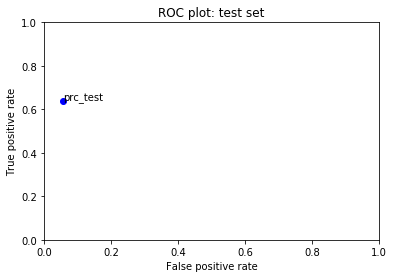

In [127]:
# fits = [ols_performance_test, lgs_performance_test, nbs_performance_test, prc_performance_test, rdg_performance_test, rdf_performance_test]
fits = [prc_performance_test]
for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# <span style="color:red">SUBMISSION</span>

---

In [128]:
# read in test data for submission
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='/Users/jeharrahpearl/machine-learning-2/ml/final_assignment_1/data/toxiccomments_train.csv', my_random_seed=86, test=True)
print("Number of rows in the submission test set (should be 153,164): ")

Shape of HashingVectorizer X:
(159571, 131072)
Look at a few rows of the new quantitative features: 
   word_count  punc_count  exclamation
0          42           5            0
1          18           2            1
2          42           3            0
3         112           3            0
4          13           1            0
5          12           1            0
6           8           0            0
7          21           2            0
8          83           7            0
9          12           0            0
Size of combined bag of words and new quantitative variables matrix:
(159571, 131075)
(159571, 131075)
Shape of X_test for submission:
(159571, 131075)
SUCCESS!
Number of rows in the submission test set (should be 153,164): 


---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [129]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = ols.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

0.5147614541489368


In [130]:
raw_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,word_count,punc_count,exclamation
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,42,5,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,18,2,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,42,3,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,112,3,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,13,1,0


In [131]:
my_submission.head()

,id,prediction
0,0000997932d777bf,True
1,000103f0d9cfb60f,True
2,000113f07ec002fd,True
3,0001b41b1c6bb37e,True
4,0001d958c54c6e35,False


In [132]:
my_submission.shape

(159571, 2)

In [133]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('/Users/jeharrahpearl/machine-learning-2/ml/final_assignment_1/data/toxiccomments_submission.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation